# sfreq-wise accuracy

last modified: 21.10.2023

purpose: effect of sampling frequency on sorting accuracy

## Setup

activate `npx_10m_384ch_unit_classes`

In [2]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib import pyplot as plt

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/sfn_2023"
os.chdir(PROJ_PATH)

# GET CUSTOM LIBRARY
from src.nodes.utils import get_config
from src.nodes.postpro.accuracy import get_sorting_accuracies

# npx384-10KHz
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_06_26"
data_conf, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()
KS3_SORTING_PATH_10Khz = data_conf["sorting"]["sorters"]["kilosort3"]["output"]
GT_SORTING_PATH_10Khz = data_conf["sorting"]["simulation"]["ground_truth"]["output"]


# npx384-40KHz
EXPERIMENT_40KHz = "silico_neuropixels"
SIMULATION_DATE_40KHz = "2023_10_18"
data_conf_40KHz, _ = get_config(EXPERIMENT_40KHz, SIMULATION_DATE_40KHz).values()
KS3_SORTING_PATH_40KHz = data_conf_40KHz["sorting"]["sorters"]["kilosort3"]["output"]
GT_SORTING_PATH_40KHz = data_conf_40KHz["sorting"]["simulation"]["ground_truth"]["output"]

2023-10-21 13:59:47,046 - root - utils.py - get_config - INFO - Reading experiment config.
2023-10-21 13:59:47,085 - root - utils.py - get_config - INFO - Reading experiment config. - done
2023-10-21 13:59:47,087 - root - utils.py - get_config - INFO - Reading experiment config.
2023-10-21 13:59:47,125 - root - utils.py - get_config - INFO - Reading experiment config. - done


## Compute (16 min)

In [3]:
# get low sampling freq accuracies
accuracies_10Khz = get_sorting_accuracies(GT_SORTING_PATH_10Khz, KS3_SORTING_PATH_10Khz)
acc_array_10Khz = np.array(accuracies_10Khz)

# get high sampling freq accuracies
accuracies_40KHz = get_sorting_accuracies(GT_SORTING_PATH_40KHz, KS3_SORTING_PATH_40KHz)
acc_array_40KHz = np.array(accuracies_40KHz)

## Plot

/tmp/ipykernel_186089/75908349.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axis.plot(acc_array_10Khz, "r", label=f"npx 10KHz (1 col, n={len(acc_array_10Khz)})", linestyle="-", marker="o", markerfacecolor="w", markeredgecolor=[.3,.3,.3], color=[.3,.3,.3], markersize=MARKERSIZE, markeredgewidth=0.4, linewidth=1);
/tmp/ipykernel_186089/75908349.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axis.plot(acc_array_40KHz, "r", label=f"npx 40KHz (1 col, n={len(acc_array_40KHz)})", linestyle="-", marker="o", markerfacecolor="w", markeredgecolor=[1,0,0], color=[1,0,0], markersize=MARKERSIZE, markeredgewidth=0.4, linewidth=1);


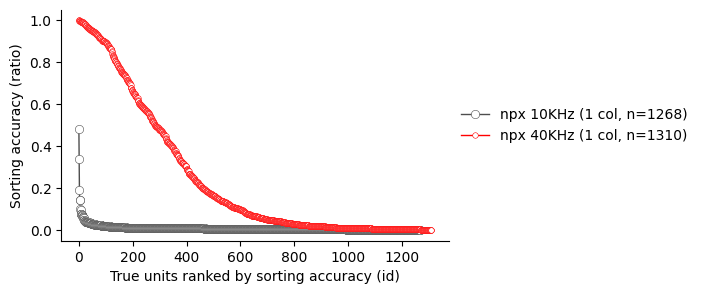

In [4]:
MARKERSIZE = 6

# plot unit accuracies
fig, axis = plt.subplots(1,1,figsize=(5,3))

# plot
axis.plot(acc_array_10Khz, "r", label=f"npx 10KHz (1 col, n={len(acc_array_10Khz)})", linestyle="-", marker="o", markerfacecolor="w", markeredgecolor=[.3,.3,.3], color=[.3,.3,.3], markersize=MARKERSIZE, markeredgewidth=0.4, linewidth=1);

MARKERSIZE = 4

# plot unit accuracies (disconnected)
axis.plot(acc_array_40KHz, "r", label=f"npx 40KHz (1 col, n={len(acc_array_40KHz)})", linestyle="-", marker="o", markerfacecolor="w", markeredgecolor=[1,0,0], color=[1,0,0], markersize=MARKERSIZE, markeredgewidth=0.4, linewidth=1);

# legend
axis.set_xlabel("True units ranked by sorting accuracy (id)");
axis.set_ylabel("Sorting accuracy (ratio)");
axis.spines[['right', 'top']].set_visible(False);
axis.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5));

# save figures
plt.savefig("figures/4_controls/pdf/sfreq_wise_accuracy.pdf")
plt.savefig("figures/4_controls/svg/sfreq_wise_accuracy.svg")

## Accuracy

In [5]:
DET_THRESH = 0.8
print("Well detected units (npx 10 KHz):", accuracies_10Khz[accuracies_10Khz >= DET_THRESH].index.tolist())
print("accuracy (npx KHz):", len(accuracies_10Khz[accuracies_10Khz >= DET_THRESH])/len(accuracies_10Khz))

Well detected units (npx 10 KHz): []
accuracy (npx KHz): 0.0


In [6]:
print("Well detected units (npx 40 KHz):", accuracies_40KHz[accuracies_40KHz >= DET_THRESH].index.tolist())
print("accuracy (npx 40 KHz):", len(accuracies_40KHz[accuracies_40KHz >= DET_THRESH])/len(accuracies_40KHz))

Well detected units (npx 40 KHz): [236454, 2148124, 3514704, 891776, 1981516, 1852927, 1855885, 691727, 499827, 3699020, 1736462, 3891529, 2870817, 1864097, 2536998, 785113, 1860371, 1921418, 1367812, 2145865, 2061088, 1808832, 141668, 2639635, 2323761, 1912824, 1664728, 2863830, 2008365, 3936308, 1782313, 2205117, 2219300, 2892132, 1047815, 2203846, 684054, 2795437, 2473130, 2173940, 2076919, 1407814, 4068988, 4068360, 4006002, 2099479, 3743596, 1684667, 739303, 2015083, 3783050, 1469180, 1775186, 1425768, 505734, 2065572, 1813372, 3443482, 1527208, 1942643, 582918, 1916639, 1797892, 1368911, 1965751, 2401194, 1878074, 3050647, 710717, 281388, 2075781, 1860823, 1885202, 3670248, 1811293, 3517481, 1858700, 1958413, 39973, 2191079, 3800792, 2050137, 533615, 4001779, 4111550, 1972346, 4066356, 4094711, 2096886, 1972603, 3597652, 3916330, 4190026, 3450833, 1964085, 3619329, 2104770, 841273, 3575741, 858861, 4108309, 1766796, 2083630, 3951208, 3993908, 1829418, 1949894, 703841, 1799236, 25